In [ ]:
def rk4(t0, t1, y0, ydot_fun, params):
    # This function implements the Runge-Kutta equations k1-k4.
    dt = t1 - t0
    k1 = dt * ydot_fun(y0, t0, params)
    k2 = dt * ydot_fun(y0 + 0.5 * k1, t0 + dt * 0.5, params)
    k3 = dt * ydot_fun(y0 + 0.5 * k2, t0 + dt * 0.5, params)
    k4 = dt * ydot_fun(y0 + k3, t0 + dt, params)
    y1 = y0 + (k1 + 2 * k2 + 2 * k3 + k4) / 6.0
    return y1

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def ode_steps(ydot_fun, y0, t, params, rk4):
    Y = np.zeros([len(t), len(y0)])
    Y[0, :] = y0
    for i in range(len(t) - 1):
        Y[i + 1, :] = rk4(t[i], t[i + 1], Y[i, :], ydot_fun, params)
    return Y

In [ ]:
def ydot_fun(y, t, params):
    # This function contains the Julian volcanic tremor model.
    # Hard-coded constant parameters.
    k = 600 * 10**6
    M = (3 * 10**5) * 0
    rho = 2500
    eta = 50
    p2 = 0.1 * 10**6
    h0 = 1
    L = 10
    A = 10**7
    # Input magma pressure.
    p1 = params[0]
    # Calculate the ODE parameters.
    ydot = np.zeros(len(y))
    effectm = M + rho * L**3 / 12 / y[1]
    damp_0 = L**3 / 12 / y[1]
    damp_1 = (12 * eta / y[1]**2 - rho / 2 * y[2] / y[1])
    damping = A + damp_0 * damp_1
    kcoeff = k * (y[1] - h0)
    Lcoeff = L * (p1 + p2) / 2 - L * rho * y[0]**2 / 2
    # Implement the three ODEs.
    ydot[0] = (p1-p2)/(rho*L)-(12*eta*y[0])/(rho*y[1]**2)
    ydot[1] = y[2]
    ydot[2] = (Lcoeff-kcoeff-damping*y[2])/effectm
    return ydot

In [ ]:
p1 = 18 * 10**6 # Input pressure.
y0 = np.array([174, 0.280, 5.74]) # Initial conditions.
t = np.arange(0, 20, 0.001) # Simulation time steps.
params = np.array([p1])
Y = ode_steps(ydot_fun, y0, t, params, rk4)

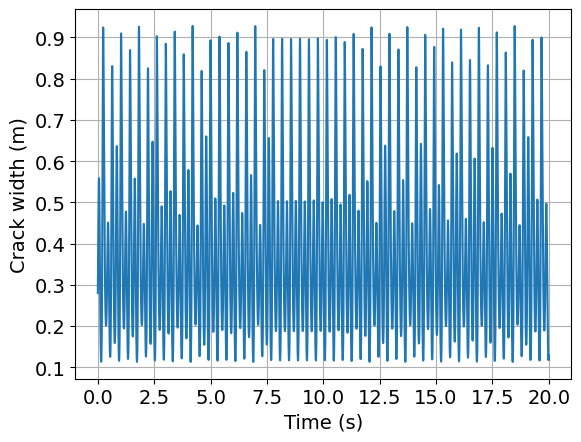

In [ ]:
plt.plot(t, Y[:, 1])
plt.ylabel("Crack width (m)", fontsize = 14)
plt.xlabel("Time (s)", fontsize = 14)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.grid(True)
plt.show()

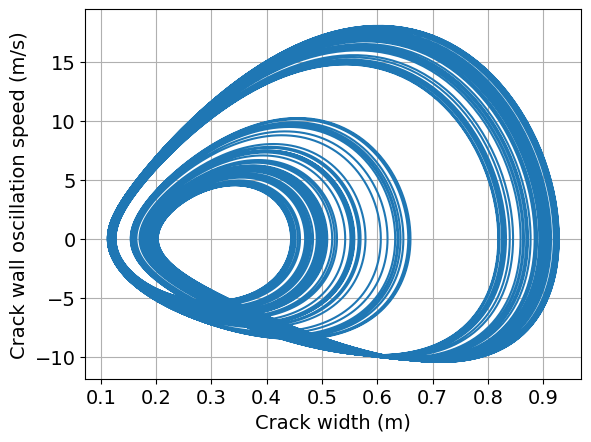

In [ ]:
plt.plot(Y[:,1], Y[:, 2])
plt.ylabel("Crack wall oscillation speed (m/s)", fontsize = 14)
plt.xlabel("Crack width (m)", fontsize = 14)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.grid(True)

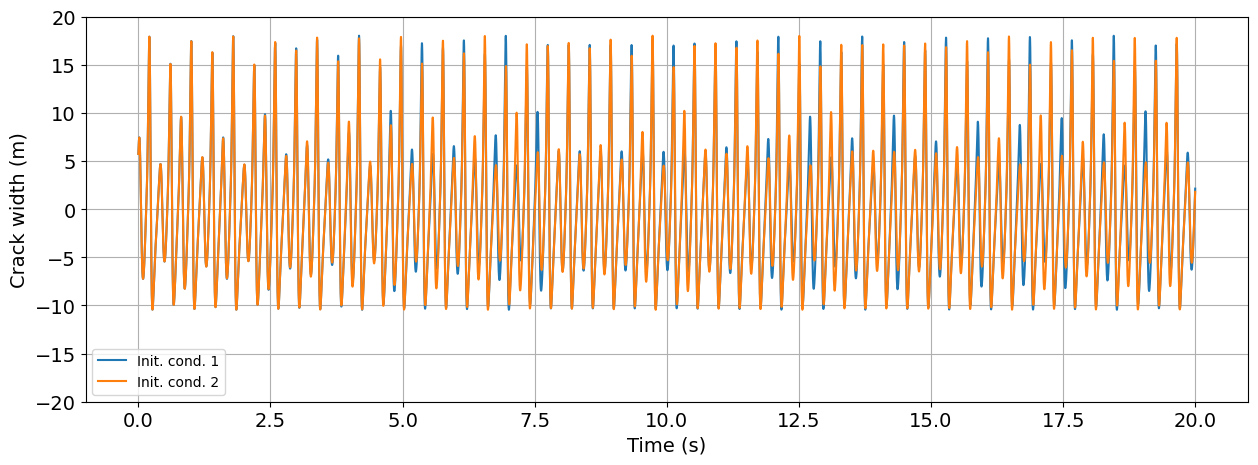

In [ ]:
p1 = 18 * 10**6 # Same input pressure.
y0 = np.array([174.1, 0.280, 5.74]) # New initial conditions.
t = np.arange(0, 20, 0.001) # Same simulation time steps.
params = np.array([p1])
Y1 = ode_steps(ydot_fun, y0, t, params, rk4)
plt.figure(figsize = (15, 5))
plt.plot(t, Y[:, 2])
plt.plot(t, Y1[:, 2])
plt.ylabel("Crack width (m)", fontsize = 14)
plt.xlabel("Time (s)", fontsize = 14)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.legend(["Init. cond. 1", "Init. cond. 2"])
plt.grid(True)
plt.ylim([-20, 20])
plt.show()